In [26]:
import MetaTrader5 as mt5
import pandas as pd
import time
from datetime import datetime, timedelta
import ta
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('dark_background')


Making a master dataframe which contains the OHLCV prices for currency pairs

In [37]:

mt5.initialize()

symbols = ['XAUUSD', 'EURUSD', 'GBPUSD', 'AUDUSD', 'GBPJPY', 'USDJPY', 'NZDUSD',  'USDCAD', 'AUDNZD' , 'EURGBP', 'SP500USD', 'BTCUSD' ]
timeframe = mt5.TIMEFRAME_H1
start_date = datetime(2023, 1, 1)
end_time = datetime.now()
    
def get_data(symbol, timeframe, start_date, end_time):
    rates = mt5.copy_rates_range(symbol, timeframe, start_date, end_time)
    df = pd.DataFrame(rates)
    df = df[['time','close']]
    df['time'] = pd.to_datetime(df['time'], unit='s')
    df.set_index('time', inplace=True)
    return df

symbols_data = {}

for symbol in symbols:
    symbols_data[symbol] = get_data(symbol, timeframe, start_date, end_time)
    
# Concatenate data for each symbol into a single DataFrame
symbols_data_concatenated = pd.concat(symbols_data, axis=1)


symbols_data_concatenated



,XAUUSD,EURUSD,GBPUSD,AUDUSD,GBPJPY,USDJPY,NZDUSD,USDCAD,AUDNZD,EURGBP,SP500USD,BTCUSD
,close,close,close,close,close,close,close,close,close,close,close,close
time,,,,,,,,,,,,
2023-01-02 08:00:00,NaN,1.06967,1.20747,0.68064,158.124,130.932,0.63310,1.35452,1.07533,0.88509,NaN,NaN
2023-01-02 09:00:00,NaN,1.06935,1.20747,0.68046,158.193,130.967,0.63320,1.35496,1.07458,0.88474,NaN,16664.000
2023-01-02 10:00:00,NaN,1.06791,1.20628,0.67987,157.994,130.951,0.63230,1.35474,1.07548,0.88500,NaN,16677.000
2023-01-02 11:00:00,NaN,1.06788,1.20454,0.68014,157.726,130.940,0.63270,1.35486,1.07515,0.88647,NaN,16660.900
2023-01-02 12:00:00,NaN,1.06784,1.20458,0.67947,157.646,130.876,0.63250,1.35598,1.07415,0.88651,NaN,16670.300
...,...,...,...,...,...,...,...,...,...,...,...,...
2024-05-03 07:00:00,2307.35,1.07322,1.25475,0.65733,191.866,152.916,0.59679,1.36658,1.10135,0.85535,5078.52,59569.738
2024-05-03 08:00:00,2306.01,1.07357,1.25500,0.65785,191.999,152.995,0.59744,1.36620,1.10107,0.85545,5080.27,59493.738


Plotting a correlation graph for the close prices of the currency pairs

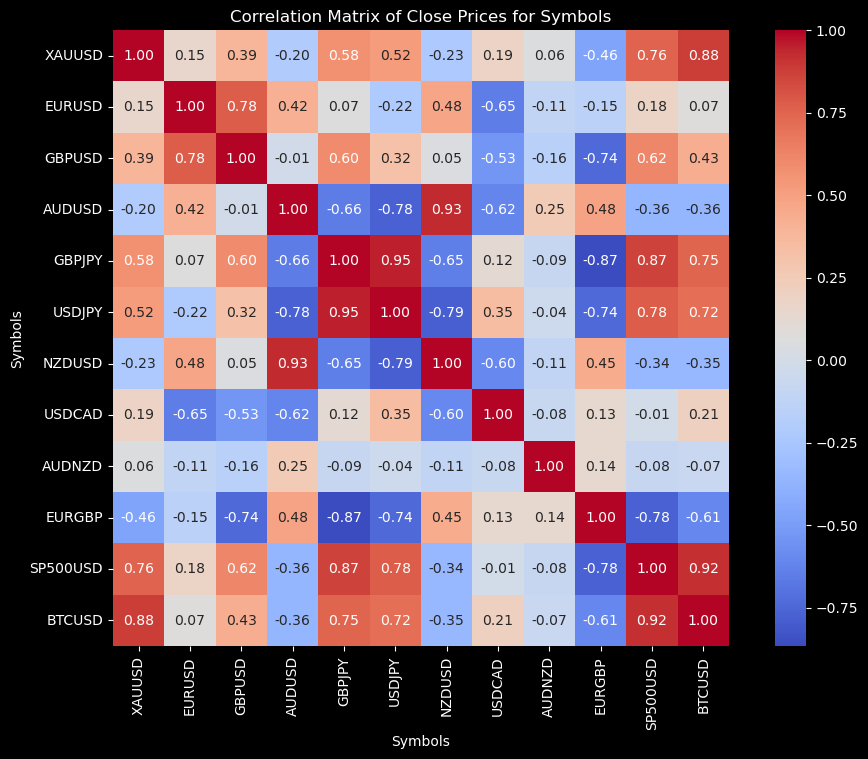

In [38]:
# Extract close prices for each symbol
close_prices = symbols_data_concatenated.xs('close', axis=1, level=1)

# Calculate correlation matrix
correlation_matrix = close_prices.corr()

# Plot correlation matrix as heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Correlation Matrix of Close Prices for Symbols')
plt.xlabel('Symbols')
plt.ylabel('Symbols')
plt.show()

Plotting currency pairs so see price movement correlation


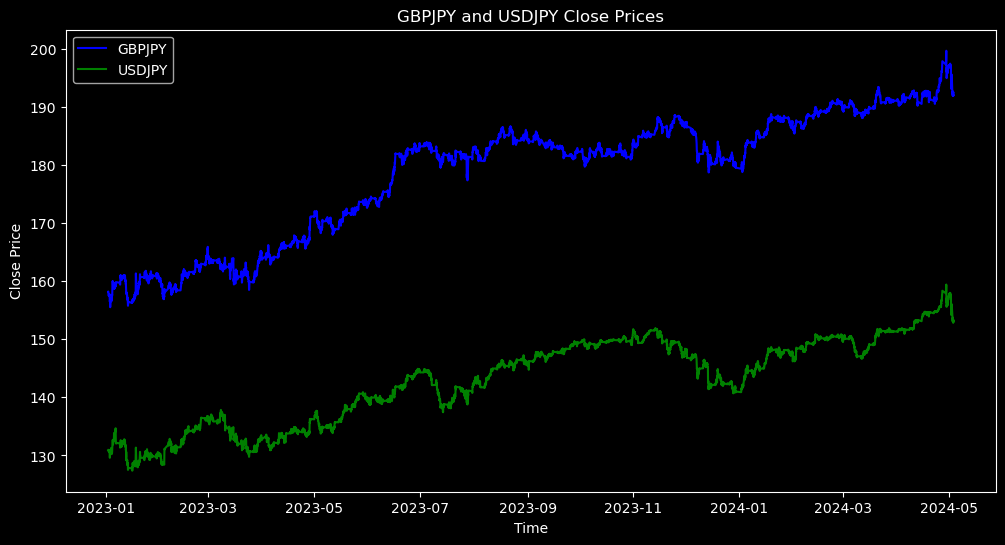

In [39]:
# Extract close prices for GBPJPY and USDJPY
symbol1 = symbols_data_concatenated['GBPJPY']['close'].dropna()
symbol2 = symbols_data_concatenated['USDJPY']['close'].dropna()

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(symbol1.index, symbol1.values, label='GBPJPY', color='blue')
plt.plot(symbol2.index, symbol2.values, label='USDJPY', color='green')
plt.title('GBPJPY and USDJPY Close Prices')
plt.xlabel('Time')
plt.ylabel('Close Price')
plt.legend()
plt.grid(False)
plt.show()

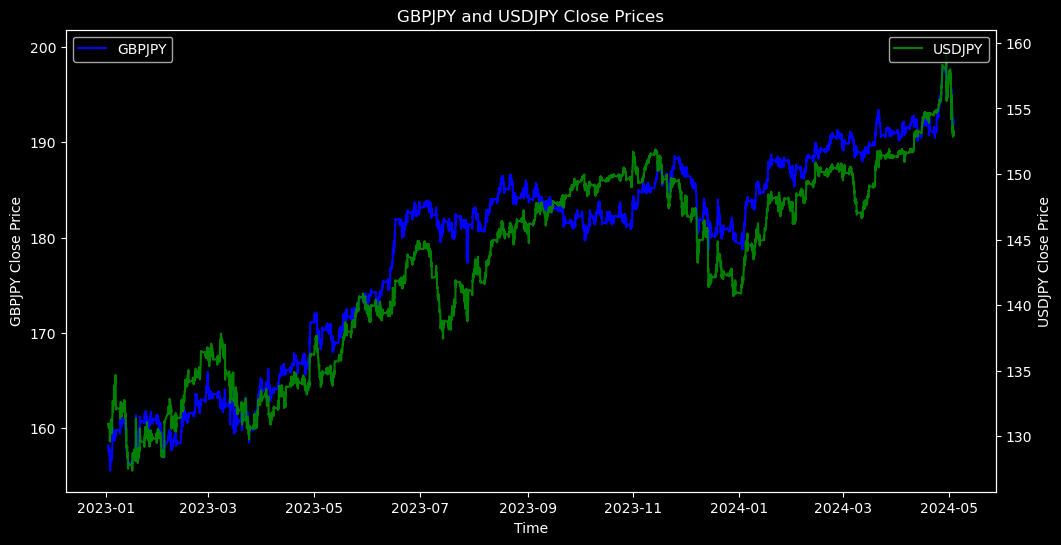

In [40]:

# Example data (replace this with your actual data)
symbol1 = symbols_data_concatenated['GBPJPY']['close'].dropna()
symbol2 = symbols_data_concatenated['USDJPY']['close'].dropna()

# Create figure and axes
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot GBPJPY on the first axis
ax1.plot(symbol1.index, symbol1.values, label='GBPJPY', color='blue')
ax1.set_xlabel('Time')
ax1.set_ylabel('GBPJPY Close Price')
ax1.tick_params('y')

# Create a twin Axes sharing the same x-axis
ax2 = ax1.twinx()

# Plot USDJPY on the second axis
ax2.plot(symbol2.index, symbol2.values, label='USDJPY', color='green')
ax2.set_ylabel('USDJPY Close Price')
ax2.tick_params('y')

# Add legend
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.title('GBPJPY and USDJPY Close Prices')
plt.grid(False)
plt.show()


Constructing a chart for the difference between the pairs

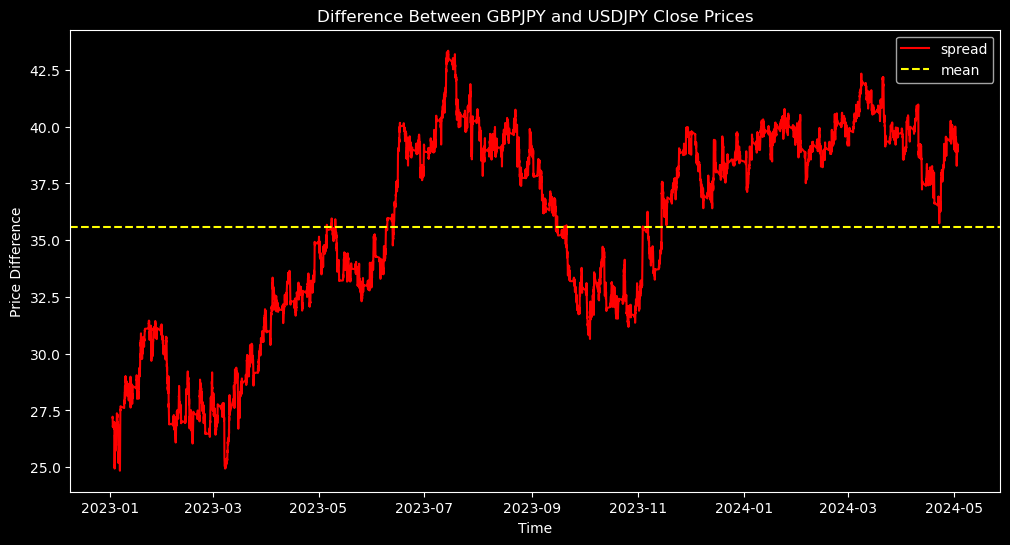

In [42]:
# Calculate the difference between USDJPY and GBPJPY close prices
price_diff = symbol1 - symbol2

price_diff = price_diff.dropna()

# Plotting the difference
plt.figure(figsize=(12, 6))
plt.plot(price_diff.index, price_diff.values, label='Difference (GBPJPY - USDJPY)', color='red')
plt.axhline(price_diff.mean(), color = 'yellow', linestyle = '--')
plt.title('Difference Between GBPJPY and USDJPY Close Prices')
plt.xlabel('Time')
plt.ylabel('Price Difference')
plt.legend(['spread', 'mean'])
plt.grid(False)
plt.show()

In [43]:
# Calculate mean and standard deviation
mu = price_diff.mean()
sigma = price_diff.std()

# Calculate Z-score for each data point
z_scores = (price_diff - mu) / sigma


In [44]:
z_scores

time
2023-01-02 08:00:00   -1.901520
2023-01-02 09:00:00   -1.893834
2023-01-02 10:00:00   -1.935201
2023-01-02 11:00:00   -1.993296
2023-01-02 12:00:00   -1.996913
                         ...   
2024-05-03 07:00:00    0.756391
2024-05-03 08:00:00    0.768598
2024-05-03 09:00:00    0.767467
2024-05-03 10:00:00    0.780126
2024-05-03 11:00:00    0.814034
Name: close, Length: 8329, dtype: float64

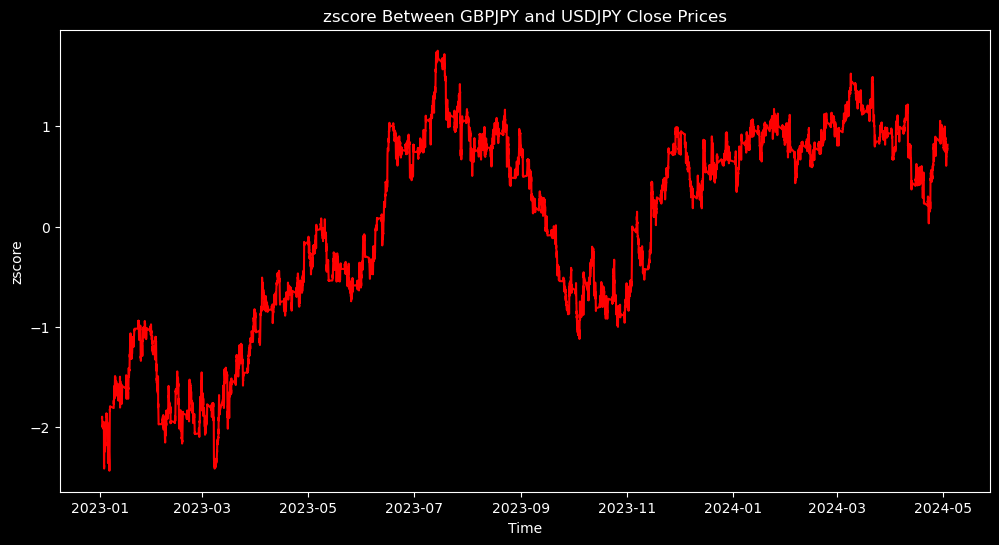

In [45]:
# Plotting the difference
plt.figure(figsize=(12, 6))
plt.plot(z_scores.index, z_scores.values, label='z score (GBPJPY - USDJPY)', color='red')
plt.title('zscore Between GBPJPY and USDJPY Close Prices')
plt.xlabel('Time')
plt.ylabel('zscore')
plt.grid(False)
plt.show()

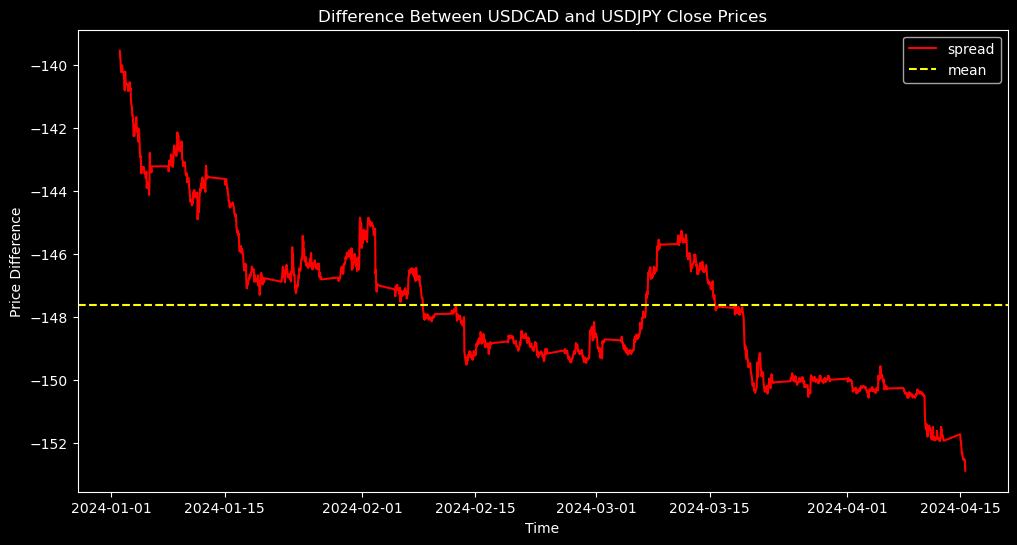

In [46]:
# Calculate the difference between USDJPY and GBPJPY close prices
price_diff2 = symbol3 - symbol4

price_diff2 = price_diff2.dropna()

# Plotting the difference
plt.figure(figsize=(12, 6))
plt.plot(price_diff2.index, price_diff2.values, label='Difference (USDCAD - USDJPY)', color='red')
plt.axhline(price_diff2.mean(), color = 'yellow', linestyle = '--')
plt.title('Difference Between USDCAD and USDJPY Close Prices')
plt.xlabel('Time')
plt.ylabel('Price Difference')
plt.legend(['spread', 'mean'])
plt.grid(False)
plt.show()

Cointegration

In [49]:
from statsmodels.tsa.stattools import adfuller

# Perform Augmented Dickey-Fuller test
result = adfuller(price_diff.dropna())

# Extracting test statistics and p-value
adf_statistic = result[0]
p_value = result[1]

# Print the results
print(f'ADF Statistic: {adf_statistic}')
print(f'p-value: {p_value}')

# Interpret the results
if p_value < 0.05:
    print('Reject the null hypothesis. The series is stationary.')
else:
    print('Fail to reject the null hypothesis. The series is not stationary.')

ADF Statistic: -2.136768717745017
p-value: 0.22998895621219645
Fail to reject the null hypothesis. The series is not stationary.
